# Important:

Please note that the database is too big to be uploaded to GitHub. Therefore, please use the following link to download the "Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19" dataset from the following link to analyse through this program.

https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products

# Sentiment Analysis with Spacy and TextBlob

This is a program to analyse polarity of text (understanding if the sentiment of the text is positive, neutral, or negative) using Spacy and TextBlob.

For this purpose, we are using Amazon consumer reviews of products for Kaggle.com.

Please note that all the necessary libraries are already installed.

### Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
from textblob import TextBlob
from wordcloud import WordCloud
from collections import defaultdict
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay

### Mounting our drive and mapping to our dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/CoGrammer/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'

amazon_reviews_dataframe_raw = pd.read_csv(file_path)

# Reviewing a subset of our Dataframe.
amazon_reviews_dataframe_raw.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [ ]:
# Reviewing another subset of the Dataframe.
amazon_reviews_dataframe_raw.tail()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
28327,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1,http://reviews.bestbuy.com/3545/5620410/review...
28328,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5620410/review...,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,fireman21,http://reviews.bestbuy.com/3545/5620410/review...
28329,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,"Very nice for light internet browsing, keeping...",You get a lot for the price!,suzannalicious,http://reviews.bestbuy.com/3545/5620410/review...
28330,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!,SandyJ,http://reviews.bestbuy.com/3545/5620410/review...
28331,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5620410/review...,"At ninety dollars, the expectionations are low...",You get what your paying for,Hung,http://reviews.bestbuy.com/3545/5620410/review...


## Overview of our Dataset (Description)

From our Dataframe we see that this Dataframe is all about what products was sold, sales date and time, ratings, reviews, will recommend, review titles etc.

Understanding the shape of our Dataframe.



In [ ]:
amazon_reviews_dataframe_raw.shape

(28332, 24)

We see that we have 28332 rows and 24 columns.



Understanding the columns we have, to determine what is necessary for our analysis.

In [ ]:
amazon_reviews_dataframe_raw.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

We see that there are many columns in our Dataframe but we will probably use only few for our analysis. Namely:

* reviews.doRecommend

* reviews.rating

* reviews.text

* reviews.title

In [ ]:
# Looking at reviews.doRecommend column to find out more information.
# Please note that this column is only taken into consideration to see if we can
# compare the results of our model to something so that we can create a confusion
# matrix.
amazon_reviews_dataframe_raw[['reviews.doRecommend']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   reviews.doRecommend  16086 non-null  object
dtypes: object(1)
memory usage: 221.5+ KB


We see that there are only 16086 no-null values in this column therefore a large part of the data from this column should be missing.

Below we will find out what percentage of data is missing from this column.

In [ ]:
total_cells = np.product(amazon_reviews_dataframe_raw['reviews.doRecommend'].shape)
missing_value_count_do_recommend = amazon_reviews_dataframe_raw[['reviews.doRecommend']].isnull().sum()

missing_percentage_do_recommend = (missing_value_count_do_recommend / total_cells) * 100

missing_percentage_do_recommend


reviews.doRecommend    43.223211
dtype: float64

We see from above that more than 43% of data in this column is missing. Therefore, there won't be any sense to use this column.

In [ ]:
# Checking other relevant columns to see if they have any missing values.
amazon_reviews_dataframe_raw[['reviews.rating', 'reviews.text', 'reviews.title']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews.rating  28332 non-null  int64 
 1   reviews.text    28332 non-null  object
 2   reviews.title   28332 non-null  object
dtypes: int64(1), object(2)
memory usage: 664.2+ KB


### Selecting Columns

We will only select three columns for our review:

**reviews.rating:** This column is selected to see if we can use these ratings to build a confusion matrix. Please note that following assumptions will be taken when building a confusion matrix using this column:



1.   There might not be a direct relation to the polarity we find from the review text and how the customer has rated the product. For example: the customer might have rated the product 4 or 5 but have only written a small sentence in review on how satisfied they were, resulting a neutral polarity.

2.   This is not a structured way of finding the accuracy of the model. Normally, one would have a dataset with a manual entry determining if a review is positive or negative, on which the model can train and then we can test the prediction against the test data. This is just a trial to see if we can build a model which can compare accuracy on the basis of the ratings (category 1 to 5)

Ultimately, we will have to decide if building a model like this is worth it or not, by analysing the confusion matrix and accuracy score.


***reviews.text:** This is the main column where we will perform our sentiment analysis based on polarity of the text of each cell.

**reviews.title:** I have chosen the review title column as well to see if it gives better prediction based on the title text. However, the chances of this are bleak as polarity of the text is measure by TextBlob by aggregating the positive and negative scores of each word, therefore as there are less number of words, we are working with a smaller set and thus the results might not be specific. We will only decide if we use this column or not, after we see how the model has performed with review.text column first.

In [ ]:
# Selecting relevant columns
amazon_reviews_rel_columns = amazon_reviews_dataframe_raw[['reviews.rating', 'reviews.text', 'reviews.title']]
amazon_reviews_rel_columns

,reviews.rating,reviews.text,reviews.title
0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...
...,...,...,...
28327,5,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift
28328,4,I bought this for my niece for a Christmas gif...,yes it is a great tablet.
28329,5,"Very nice for light internet browsing, keeping...",You get a lot for the price!
28330,5,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!


### Checking info and dtype to get the information about the columns and see if we have correct data type

In [ ]:
amazon_reviews_rel_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews.rating  28332 non-null  int64 
 1   reviews.text    28332 non-null  object
 2   reviews.title   28332 non-null  object
dtypes: int64(1), object(2)
memory usage: 664.2+ KB


In [ ]:
amazon_reviews_rel_columns.dtypes

reviews.rating     int64
reviews.text      object
reviews.title     object
dtype: object

## Data Cleaning

### Checking for NaN values in the Dataframe


In [ ]:
amazon_reviews_rel_columns.isna().sum()

reviews.rating    0
reviews.text      0
reviews.title     0
dtype: int64

### Checking for empty cells in the Dataframe.


In [ ]:
amazon_reviews_rel_columns.isnull().sum()

reviews.rating    0
reviews.text      0
reviews.title     0
dtype: int64

### Checking if any of the cells in the Dataframe is only a whitespace


In [ ]:
blanks = []

# Using itertuples(), it returns a tuple with the index as the first element,
# followed by the row values in following indexes.
# Iterate through each row using itertuples
for row in amazon_reviews_rel_columns.itertuples():
    ## Iterate through each cell in the row
    for cell in row[1:]:  # Skip the first element which is the index
        if str(cell).isspace():  # Convert cell to string and check if it contains only whitespace
            blanks.append(row.Index)  # Append index of the row with whitespace to the blanks list

print(blanks)  # Printing the results to see all index position which has whitespaces.

[]


As we can see there are no NaN values, empty cells or cells with just white spaces in our selected columns. Therefore, we are ready to proceed.

In [ ]:
# Making sure that the review rating column has only 5 unique values for 5 category of ratings (1 to 5)
amazon_reviews_rel_columns['reviews.rating'].nunique()

5

In [ ]:
# Finding out statistics about the reviews rating column.
amazon_reviews_rel_columns.describe()

,reviews.rating
count,28332.000000
mean,4.514048
std,0.934957
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


We see from above that our rating column has lowest value of 1 and highest of 5 which matches our requirement.

## Creating NLP model.

Loading English library and analysing a polarity of a single review cell just to test our model.

***Important:*** Please note that I have already submitted the task using small English library. However, for this submission I am using the medium English library for more accuracy.

In [ ]:
# Loading the spaCy model
nlp = spacy.load("en_core_web_md")

blob = TextBlob(amazon_reviews_rel_columns['reviews.text'][0])
polarity = blob.sentiment.polarity

polarity

-0.44999999999999996

In [ ]:
amazon_reviews_rel_columns['reviews.text'][0]

'I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.'

For the first cell in the review text column, we first find the polarity of  
 -0.45 and then we see from the text that indeed that it is a negative review.

## Creating a function (polarity analysis):

This function will take the text in each cell and then convert it to tokens by using Spacy library and then concert those tokens to string before we use TextBlob to understand the polarity of the text.

We will initialise 2 list (polarity_scores and sentiment_analysis) to store the results of polarity scores and a sentiment analysis (based on polarity score) in each iteration.

In [ ]:


def get_polarity_and_sentiment(review_text):

  # Intializing two list to store polarity scores and sentiments in each iteration.
  polarity_scores = []
  sentiment_analysis = []

  # With a for loop, we will iterate through all cells of a column and then store
  # polarity scores and sentiments in each iteration.

  for sentences in review_text:

      # Creating unicode string from our original string through Spacy to retrieve tokens
      review = nlp(sentences)
      # Getting lemmetization of tokens and only including words which are not stop words and not non alpha values.
      tokens = [token.lemma_.lower().strip() for token in review if not token.is_stop and token.is_alpha]
      # Converting tokens back to string and fitting it in TextBlob
      blob = TextBlob(str(tokens))
      polarity = blob.sentiment.polarity # Getting polarity of the text.
      polarity_scores.append(polarity) # Appending polarity_scores list with the current polarity score.

      # Using if and elif to convert the polarity scores to Positive, Negative and Neutral (sentiments)
      # based on if the score is more than, equal to or less than zero respectively.
      # Adding the sentiments to a list on each iteration.
      if polarity > 0:
        sentiment_analysis.append("Positive")
      elif polarity < 0:
        sentiment_analysis.append("Negative")
      elif polarity == 0:
        sentiment_analysis.append("Neutral")

  # Returning the polarity_scores and sentiment analysis list.
  return polarity_scores, sentiment_analysis


Now that we have got our polarity score and sentiment analysis list, and they are of the same shape as each of our selected columns (as there were no NaN, empty and whitespace cells in these columns) therefore these two list are good to be joined to our Dataframe as additional columns.

In [ ]:
polarity_scores, sentiment_analysis = get_polarity_and_sentiment(amazon_reviews_rel_columns['reviews.text'])
amazon_reviews_rel_columns['polarity_scores'] = polarity_scores
amazon_reviews_rel_columns['sentiment_analysis'] = sentiment_analysis

<ipython-input-103-c15e9ba32fa6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_reviews_rel_columns['polarity_scores'] = polarity_scores
<ipython-input-103-c15e9ba32fa6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_reviews_rel_columns['sentiment_analysis'] = sentiment_analysis


We will check out the first 5 rows of our data now along with the newly genetated columns for polarity scores and sentiment.

In [ ]:
amazon_reviews_rel_columns.head()

,reviews.rating,reviews.text,reviews.title,polarity_scores,sentiment_analysis
0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,-0.70,Negative
1,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,-0.50,Negative
2,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,0.80,Positive
3,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,0.00,Neutral
4,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,0.25,Positive


From above, by just comparing the polarity scores and sentiment analysis to the review ratings, we see that the model did well on most of the rows. The polarity scores and sentiment analysis does gives little indication what the ratings would be. However, we also see that on index 3 the model predicted a neutral score but actually the rating was a 5. To evaluate more, we will look at index 3 of review text column.

In [ ]:
amazon_reviews_rel_columns['reviews.text'][3]

'Seem to work as well as name brand batteries at a much better price'

Indeed we see that our assumption made above is true for this cell. We have a very neutral review but actually the customer has rated the product as 5. we will check row 10 to 20 to understand if we find any more anomalies.

In [ ]:
amazon_reviews_rel_columns[['reviews.text', 'reviews.rating', 'polarity_scores', 'sentiment_analysis']].loc[10:20]

,reviews.text,reviews.rating,polarity_scores,sentiment_analysis
10,I find amazon basics batteries to be equal if ...,5,0.342857,Positive
11,When I first started getting the Amazon basic ...,3,-0.056944,Negative
12,Use it for my fish tank's light at night and w...,5,0.533333,Positive
13,just got em so I can't really comment on how g...,5,0.577778,Positive
14,we have many things that need aa battery they ...,5,0.800000,Positive
15,Thankful that I was able to find on Amazon for...,5,0.670000,Positive
16,I don't know if I would buy thus brand again s...,1,-0.050000,Negative
17,In my opinion these did not last anywhere near...,2,-0.022619,Negative
18,They don't last as long as the brand name but ...,4,0.350000,Positive
19,Bought these batteries for my Christmas gifts ...,3,-0.050000,Negative


Indeed, we find more such anomalies at index 11 and 19 where the sentiment should be neutral rather than negative. Therefore, we will again investigate further by look at the individual comments at those indices.

In [ ]:
amazon_reviews_rel_columns['reviews.text'][11]

'When I first started getting the Amazon basic batteries I really liked them. With recent purchases, they do not seem to last like they had, or maybe a mixed-bag (inconsistent with some lasting better than others). I have not done any tests, but feel some other brands may last longer. However, the price is hard to beat.'

Indeed, we see that the text has properly classified as negative, based on the content of the text but the customer still choose to give a rating of 3. Perhaps due to the fact that the customer liked the price.



In [ ]:
amazon_reviews_rel_columns['reviews.text'][19]

"Bought these batteries for my Christmas gifts the month of (december) only lasted like 2months toys now need replacement batteries . I also used some for my doorbell and just now needs replacement batteries. Tv Remote control is still working but these batteries don't last very long..."

Again, we see here that the text has properly classified as negative, based on the content of the text but the customer still chooses to give a rating of 3.

Due to an approximate average of 20% data being mis-rated when compared to the text, therefore we will go ahead and make a confusion matrix using the ratings column, but we might not be able to get a good accuracy score with this implementation.

## Visualising polarity of words according to their polarity scores.

We will initialise three dictionary objects for positive, neutral, and negative words, where we will store the words according to their polarity.

In [ ]:
# Initialize dictionaries to hold positive and negative words
positive_words = defaultdict(int)
neutral_words = defaultdict(int)
negative_words = defaultdict(int)

We will use a for loop to iterate through each cell of reviews.text column and then we will change the text to unicode using SpaCy, finally we will only grab the lower case, lemmatized version of the tokens where the token is not a stop word or a non-alphabet values.

Then with a nested for loop we will loop through the whole text (in the cell in current iteration), analyse polarity and with a simple if elif statements, we will store the words (changed from token to string again and then lower case) in different dictionary objects according to their polarity.

In [ ]:
for sentence in amazon_reviews_rel_columns['reviews.text']:
    # Using SpaCy to change the text of each cell to a unicode so that we can extract tokens from it.
    # then only grabbing tokens (lower case, lemmatized) which are not a stop word or a non alpha value
    sentence = nlp(sentence)
    tokens = [token.lemma_.lower().strip() for token in sentence if not token.is_stop and token.is_alpha]

    # Now we will iterate through each token the in the whole text (list of tokens grabbed above)
    # and first we will analyse polarity of each token and then store the word for each token
    # in a dictionary object with if elif statement to segregate according to polarity score of the word.
    for token in tokens:

        blob = TextBlob(str(token))
        polarity = blob.sentiment.polarity

        if polarity > 0:
            positive_words[str(token).lower()] += 1
        elif polarity < 0:
            negative_words[str(token).lower()] += 1
        elif polarity == 0:
            neutral_words[str(token).lower()] += 1

Using wordcloud to generate a word cloud visualization based on the frequencies of words provided in all three dictionaries.

In [ ]:
pos_wordcloud = WordCloud(width=400, height=200, background_color ='white').generate_from_frequencies(positive_words)
neu_wordcloud = WordCloud(width=400, height=200, background_color ='white').generate_from_frequencies(neutral_words)
neg_wordcloud = WordCloud(width=400, height=200, background_color ='white').generate_from_frequencies(negative_words)

Creating 3 subplots (using the dictionaries created above) using Matplotlib

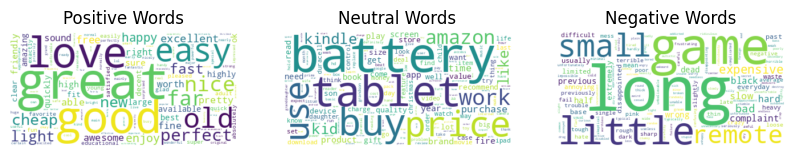

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].imshow(pos_wordcloud, interpolation='bilinear')
ax[0].set_title('Positive Words')
ax[0].axis('off')

ax[1].imshow(neu_wordcloud, interpolation='bilinear')
ax[1].set_title('Neutral Words')
ax[1].axis('off')

ax[2].imshow(neg_wordcloud, interpolation='bilinear')
ax[2].set_title('Negative Words')
ax[2].axis('off')

plt.show()

## Evaluation

We indeed see that the model has done fairly well on seperating the words according to their polarity. We have also seen the model working fairly well when we analysed each comment manually, specially the ones for which polarity scores were equal to zero. We have seen that there are not enough positive words in those text to aggregate a polarity score of more than zero. Therefore we can say that the English library has done a fairly good job. We have also seen above how the polarity of the text in the review does not necessarily relate to the review rating columns.

## Strengths and limitations

**Strengths:**

We can clearly see that the libraries used in this task are really powerful in understanding the polarity of each token and hence the sentiment of the whole text. It is easy to implement and replicate.

**Limitations:**

We see that Positive and Neutral words are seperated properly, however the model had bit of trouble recognising the Negative words when visualised. This can be a result of the frequency of the word rather than polarity itself. This can also be a result of using the medium English library. Perhaps the large English library be able to do a better job at measuring polarity.

Also, the model takes a long time to run with medium English library, perhaps will take even longer to run with the large English library.

## Important

I am not sure why .similarity is being asked to use in the task as .similary is to understand the cosine similarity (angle) of two vector which two pieces of text will form according to the English library we load. This does not judge the polarity of the text itself. However, I have still included the code below for just in case.

In [ ]:
nlp(amazon_reviews_rel_columns['reviews.text'][12]).similarity(nlp(amazon_reviews_rel_columns['reviews.text'][13]))

0.9139583874148344

## Building a confusion matrix:

As discussed above the review.ratings column does not directly correlates with the reviews.text. However, we will still build a confusion matrix using this column to understand the accuracy.

For this, instead of categorising words to positive, neutral, and negative, we will follow a stepwise segmentation of words according to polarity. Here we create a function which provides a stepwise (5 intervals between -1 and 1) polarity score to each text with a for loop.

In [ ]:
def get_stepwise_polarity(review_text):

  # Initializing two lists to store stepwise polarity scores.
  stepwise_polarity_scores = []


  # With a for loop, we will iterate through each cell of a column and then store
  # stepwise polarity scores in each iteration.

  for sentences in review_text:

      # Creating unicode string from our original string through Spacy to retrieve tokens
      review = nlp(sentences)
      # Getting lemmatized and lower version of tokens and only including words which are not stop words and not non alpha values.
      tokens = [token.lemma_.lower().strip() for token in review if not token.is_stop and token.is_alpha]
      # Converting tokens back to string and fitting it in TextBlob
      blob = TextBlob(str(tokens))
      polarity = blob.sentiment.polarity # Getting polarity of the text.

      # Using if and elif to convert the polarity scores to values between -1 and 1
      if polarity >= -1 and polarity < -0.6:
        stepwise_polarity_scores.append(1)
      elif polarity >= -0.6 and polarity < -0.2:
        stepwise_polarity_scores.append(2)
      elif polarity >= -0.2 and polarity < 0.2:
        stepwise_polarity_scores.append(3)
      elif polarity >= 0.2 and polarity < 0.6:
        stepwise_polarity_scores.append(4)
      elif polarity >= 0.6 and polarity <= 1:
        stepwise_polarity_scores.append(5)

  # Returning the stepwise_polarity_scores.
  return stepwise_polarity_scores

In [ ]:
# Retrieving stepwise_polarity_scores
stepwise_polarity_scores = get_stepwise_polarity(amazon_reviews_rel_columns['reviews.text'])

Creating a new column with the stepwise_polarity_scores

In [ ]:
amazon_reviews_rel_columns['stepwise_polarity_scores'] = stepwise_polarity_scores

<ipython-input-116-a9b3a1a10240>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_reviews_rel_columns['stepwise_polarity_scores'] = stepwise_polarity_scores


In [ ]:
# Looking at our Dataframe with the new columns.
amazon_reviews_rel_columns.head()

,reviews.rating,reviews.text,reviews.title,polarity_scores,sentiment_analysis,stepwise_polarity_scores
0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,-0.70,Negative,1
1,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,-0.50,Negative,2
2,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,0.80,Positive,5
3,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,0.00,Neutral,3
4,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,0.25,Positive,4


### Confusion Matrix

Creating a confusion matrix with sklearn

In [ ]:
rating_labels = [1, 2, 3, 4, 5]
conf_matrix = confusion_matrix(amazon_reviews_rel_columns['reviews.rating'],amazon_reviews_rel_columns['stepwise_polarity_scores'], labels=rating_labels)

# Creating a Dataframe of our confusion matrix for better understanding.
conf_df = pd.DataFrame(conf_matrix, index=rating_labels, columns=rating_labels)

print(conf_df)

    1    2     3     4     5
1  40  138   637   129    21
2   7   40   400   141    28
3   5   66   599   452    84
4  10  114  1632  2821  1071
5  15  208  4707  9345  5622


Calculating accuracy score of our matrix based on the reviews.ratings column

In [ ]:
accuracy_score(amazon_reviews_rel_columns['reviews.rating'],amazon_reviews_rel_columns['stepwise_polarity_scores'])

0.32196809261612314

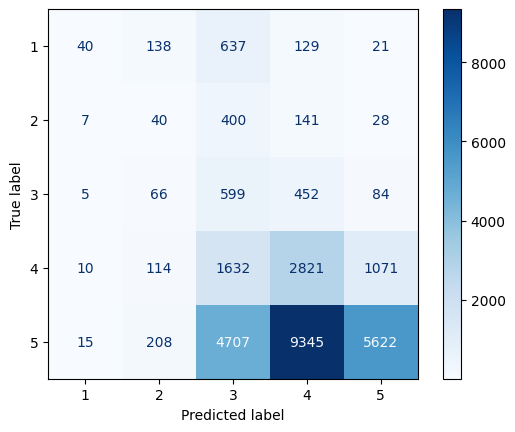

In [ ]:
## Displaying Confusion Matrix in a nice plot using ConfusionMartixDisplay.
confused = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rating_labels)
confused.plot(cmap='Blues')
plt.show()

## Confusion Matrix Evaluation:

We see from above that our assumptions made earlier was actually correct. The model did horribly when the polarity scores of the text was compared to the ratings.

We see that the model gave an accuracy of 32% which is very bad. We also see from the confusion matrix that there were a lot of wrong predictions. For example, Category 1 and 2 did the worse with only 40 correct predictions. Category 4 and 5 were the best among all with category 5 leading at 5622 correct predictions.

Therefore, we prove that our assumption (i.e. review text does not directly corelate to the review ratings) is indeed correct.

Now we will proceed analysing our reviews with NLTK.

# Sentiment Analysis with NLTK

This is a program to analyse polarity of text (understanding if the sentiment of the text is positive, neutral, or negative) using NLTK and VADER.

For this purpose, we are using Amazon consumer reviews of products for Kaggle.com.

### Importing a trained NLTK lexicon *VADER* and VADER's SentimentIntensityAnalyzer()


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Creating an instance in SintimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

Reviewing text of a single cell in reviews.text column to see how the model works in determining polarity.

Reviewing text of the same cell manually to see if the model did a good job.

In [ ]:
sid.polarity_scores(amazon_reviews_rel_columns.loc[0]['reviews.text'])

{'neg': 0.186, 'neu': 0.814, 'pos': 0.0, 'compound': -0.6908}

In [ ]:
amazon_reviews_rel_columns.loc[0]['reviews.text']

'I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.'

We see that the model has performed well on a single cell as from reading the text manually we see that the review was negative, and the model predicted it as negative as well.

We will checkout another review in the same manner to see if the model works well.

In [ ]:
sid.polarity_scores(amazon_reviews_rel_columns.loc[13]['reviews.text'])

{'neg': 0.0, 'neu': 0.911, 'pos': 0.089, 'compound': 0.4404}

In [ ]:
amazon_reviews_rel_columns.loc[13]['reviews.text']

"just got em so I can't really comment on how good the do the job, good price, quick delivery but have only put two into one of my keyboards but they can go up to a year so who can say after three days"

We see that the model has performed well on this cell as well, as from reading the text manually we see that the review was positive, and the model predicted it as positive as well.

## Creating a function to analyse polarity of each cell in the reviews.text column.

In [ ]:
def get_nltk_polarity_and_sentiment(review_text):

  # First we will create 3 empty lists to store polarity scores, compound scores and sentiment based on compound scores.
  nltk_pol_scores = []
  nltk_comp_scores = []
  nltk_sentiment_analysis = []

  # We will then iterate through each cell and find out polarity scores of each review text
  # using nltk and we will store the results of polarity scores and compound scores with each iteration.
  for sentences in review_text:

      nltk_polarity = sid.polarity_scores(sentences)
      nltk_pol_scores.append(nltk_polarity)
      nltk_comp_scores.append(nltk_polarity['compound'])

      compound_score = nltk_polarity['compound']

      # Then based on the compound score (less than, equal to or more than 0) we will label the
      # review texts Positive, Negative and Neutral in an empty list for sentiment analysis.
      if compound_score > 0:
        nltk_sentiment_analysis.append("Positive")
      elif compound_score < 0:
        nltk_sentiment_analysis.append("Negative")
      elif compound_score == 0:
        nltk_sentiment_analysis.append("Neutral")

  return nltk_pol_scores, nltk_comp_scores, nltk_sentiment_analysis

Retrieving polarity scores, compound scores and sentiment analysis labels and creating columns for each of these lists.

In [ ]:
nltk_pol_scores, nltk_comp_scores, nltk_sentiment_analysis = get_nltk_polarity_and_sentiment(amazon_reviews_rel_columns['reviews.text'])
amazon_reviews_rel_columns['nltk_pol_scores'] = nltk_pol_scores
amazon_reviews_rel_columns['nltk_comp_scores'] = nltk_comp_scores
amazon_reviews_rel_columns['nltk_sentiment_analysis'] = nltk_sentiment_analysis

<ipython-input-147-fac19383e937>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_reviews_rel_columns['nltk_pol_scores'] = nltk_pol_scores
<ipython-input-147-fac19383e937>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_reviews_rel_columns['nltk_comp_scores'] = nltk_comp_scores
<ipython-input-147-fac19383e937>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [ ]:
# Getting a first look of our relevant columns with newly added ones.
amazon_reviews_rel_columns[['reviews.text', 'nltk_pol_scores', 'reviews.rating', 'nltk_sentiment_analysis', 'nltk_comp_scores']].loc[40:50]

,reviews.text,nltk_pol_scores,reviews.rating,nltk_sentiment_analysis,nltk_comp_scores
40,"3rd purchase of these AA from Amazon, all have...","{'neg': 0.0, 'neu': 0.928, 'pos': 0.072, 'comp...",5,Positive,0.1779
41,I am 100 satisfied with my purchase of these b...,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",5,Positive,0.4215
42,I put these batteries in 10 of the 12 window c...,"{'neg': 0.0, 'neu': 0.969, 'pos': 0.031, 'comp...",3,Positive,0.1779
43,First time I bought these they worked well and...,"{'neg': 0.056, 'neu': 0.882, 'pos': 0.062, 'co...",1,Positive,0.0498
44,Seem to work very well at a great price.,"{'neg': 0.0, 'neu': 0.47, 'pos': 0.53, 'compou...",5,Positive,0.7755
45,These batteries don't last even in a simple di...,"{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'comp...",1,Positive,0.6369
46,I buy AAA and AA batteries about 4 - 6 times a...,"{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp...",5,Positive,0.2263
47,"Date on the back of these were 1992. Yeah, 199...","{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compou...",1,Positive,0.2960
48,"GOT THE 48 PACK, I USEDD THEM UP FASTER THAN I...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",4,Neutral,0.0000
49,The 48 packs are the lowest price per AA batte...,"{'neg': 0.025, 'neu': 0.901, 'pos': 0.074, 'co...",5,Positive,0.5326


Right off the back we see some discrepancy when compared the sentiments with the ratings (for eg: index 24), giving an indication of poor performance. Therefore we will look at the review manually to understand the sentiment.

In [ ]:
amazon_reviews_rel_columns['reviews.text'][24]

'These do not last long at all very cheap batteries no happy'

In [ ]:
amazon_reviews_rel_columns['nltk_sentiment_analysis'][24]

'Positive'

Indeed, we see that the review was actually negative but the model categorised it to be positive.

In the same way we will manually review the text on few other cells which we found to have discrepancies by looking at the whole Dataframe above.

In [ ]:
amazon_reviews_rel_columns['reviews.text'][29]

'these were under a light we thought they were there to fit the light when they arrived and nice company they were not the batteries we needed it should have been aa but that is ok,it was our fault not knowing this. thanks..'

In [ ]:
amazon_reviews_rel_columns['nltk_sentiment_analysis'][29]

'Negative'

In [ ]:
amazon_reviews_rel_columns['reviews.text'][43]

'First time I bought these they worked well and lasted almost as long as the name brands. Not the same this time around, almost no charge - 4-6 hours of run time - Junk batteries.'

In [ ]:
amazon_reviews_rel_columns['nltk_sentiment_analysis'][43]

'Positive'

In [ ]:
amazon_reviews_rel_columns['reviews.text'][45]

"These batteries don't last even in a simple digital clock. 2 weeks at best."

In [ ]:
amazon_reviews_rel_columns['nltk_sentiment_analysis'][45]

'Positive'

In [ ]:
amazon_reviews_rel_columns['reviews.text'][47]

'Date on the back of these were 1992. Yeah, 1992. Inedible.'

In [ ]:
amazon_reviews_rel_columns['nltk_sentiment_analysis'][47]

'Positive'

We see that a sample set of cells scrutinized above, failed to categorise the sentiment of the text properly. By manually reading all cells above (at indices 29, 43, 45 and 47) and comparing it with the sentiment label the model has provided, we see that in all these instances the model failed to predict the sentiment of the text correctly.

## Visualising polarity of words according to their polarity scores.

We will initialise three dictionary objects for positive, neutral, and negative words, where we will store the words according to their polarity.

In [ ]:
# Initialize dictionaries to hold positive and negative words
nltk_positive_words = defaultdict(int)
nltk_neutral_words = defaultdict(int)
nltk_negative_words = defaultdict(int)

Then we will use a for loop to iterate through all cells of the reviews.text column, changing the string to a Unicode using SpaCy. Then we will grab only those tokens (lemmatized and lower case) which are not stop words and not non alpha words. Then we will iterate through each token and store the word (converted to string from token) in a dictionary (one out of 3 defined above) according to its polarity score.

In [ ]:
for sentence in amazon_reviews_rel_columns['reviews.text']:

  sentence = nlp(sentence)
  tokens = [token.lemma_.lower().strip() for token in sentence if not token.is_stop and token.is_alpha]

  for word in tokens:
    nltk_polarity = sid.polarity_scores(str(word))
    nltk_compound = nltk_polarity['compound']

    if nltk_compound > 0:
      nltk_positive_words[word] += 1
    elif nltk_compound < 0:
      nltk_negative_words[word] += 1
    elif nltk_compound == 0:
      nltk_neutral_words[word] += 1

Using wordcloud to generate a word cloud visualization based on the frequencies of words provided in all three dictionaries.

In [ ]:
nltk_pos_word_cloud = WordCloud(width=400, height=200, background_color ='white').generate_from_frequencies(nltk_positive_words)
nltk_neu_word_cloud = WordCloud(width=400, height=200, background_color ='white').generate_from_frequencies(nltk_neutral_words)
nltk_neg_word_cloud = WordCloud(width=400, height=200, background_color ='white').generate_from_frequencies(nltk_negative_words)

Creating 3 subplots (using the dictionaries created above) using Matplotlib.

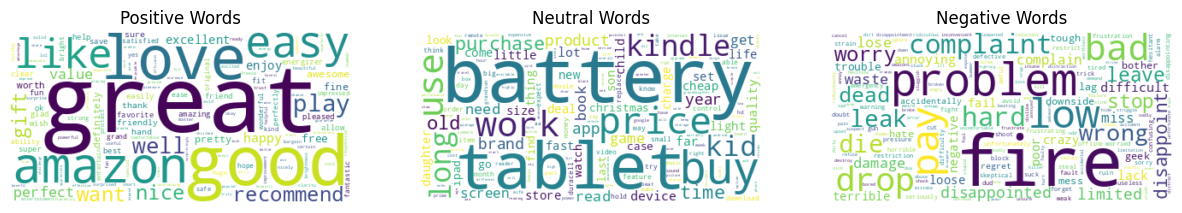

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

ax[0].imshow(nltk_pos_word_cloud, interpolation='bilinear')
ax[0].set_title('Positive Words')
ax[0].axis('off')

ax[1].imshow(nltk_neu_word_cloud, interpolation='bilinear')
ax[1].set_title('Neutral Words')
ax[1].axis('off')

ax[2].imshow(nltk_neg_word_cloud, interpolation='bilinear')
ax[2].set_title('Negative Words')
ax[2].axis('off')

plt.show()

## Evaluation

From the visualization of word cloud we can clearly see that this model (with NLTK) has done better than the SpaCy model, especially on the negative words. Although both Positive and Neutral words are similar to the SpaCy model, we see that it has interpreted Negative words more effectively.

Although when analysing a sample set of cells manually, we have noticed that there were some cells which for which sentiment was analysed incorrectly but this was the same situation with SpaCy model well. However, from the word could we can say with some relative certainty that this model has performed better than the last one.

## Conclusion:

We see that both SpaCy (when used with TextBlob) and NLTK (when used with VADER) are both powerful tools to analyse polarity. However it seems that NLTK is slightly better in this case. It should be also taken into consideration that SpaCy was used with medium English library and the results might improve with the large English library.